## Importing required packages

- **numpy** - is used for numerical calculation
- **matplotlib** - is used for data visualization

In [61]:
import numpy as np
import matplotlib.pyplot as plt

## Generating random data

- `np.random.seed(42)` is used for reproducibility of random numbers.

In [62]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

- plotting the input data generated by random number generator

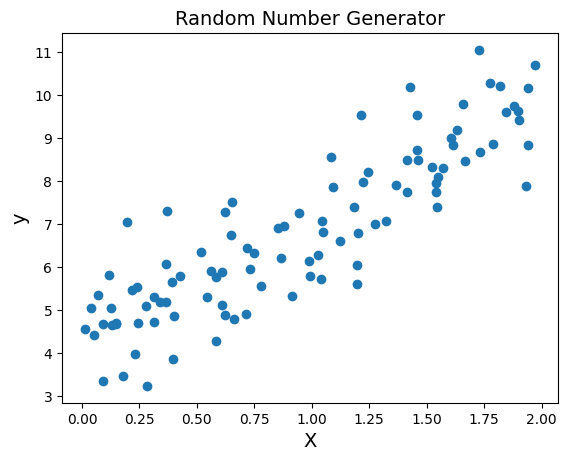

In [63]:
plt.scatter(X, y)
plt.title('Random Number Generator', fontsize='14')
plt.xlabel('X', fontsize='14')
plt.ylabel('y', fontsize='14')
plt.show()

## Split the data into training and testing sets

- splitting the data into 80:20 ratio

In [64]:
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (80, 1)
Shape of y_train: (80, 1)
Shape of X_test: (20, 1)
Shape of y_test: (20, 1)


- plotting the splitted data

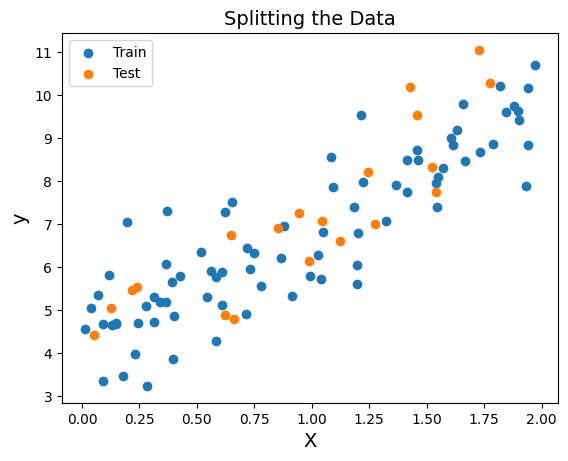

In [65]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.title('Splitting the Data', fontsize='14')
plt.xlabel('X', fontsize='14')
plt.ylabel('y', fontsize='14')
plt.legend()
plt.show()

## Add a bias term to the feature matrix

- adding bias term '1'

In [66]:
X_train_bias = np.c_[np.ones((80, 1)), X_train]
X_test_bias = np.c_[np.ones((20, 1)), X_test]

In [67]:
print(f'Shape of X_train_bias: {X_train_bias.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test_bias: {X_test_bias.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train_bias: (80, 2)
Shape of y_train: (80, 1)
Shape of X_test_bias: (20, 2)
Shape of y_test: (20, 1)


## Optimization function

$$ cost = \frac{1}{2m} \sum_{n=1}^{m} {(prediction - actual)^2} $$

In [68]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    # there are two values of theta - bias, feature
    theta = np.random.randn(X.shape[1], 1)

    cost_history = []  # Track loss values during optimization

    for iteration in range(n_iterations):
        # Calculating the predictions
        predictions = X.dot(theta)

        # Calculating the errors
        errors = predictions - y
        cost = np.mean(errors**2)
        cost_history.append(cost)

        # Calculating gradients for feature weights
        gradients_weights = 2/len(X) * X.T.dot(errors)

        # Calculating gradient for the bias term
        gradient_bias = 2/len(X) * np.sum(errors)

        # Updating parameters
        theta[1:] = theta[1:] - learning_rate * gradients_weights[1:]
        theta[0] = theta[0] - learning_rate * gradient_bias

    return theta, cost_history

In [69]:
# Train the model using batch gradient descent
theta_optimized, loss_history = batch_gradient_descent(X_train_bias, y_train)

In [70]:
theta_optimized

array([[4.18555357],
       [2.72682523]])

In [71]:
# Make predictions on the test set
y_pred = X_test_bias.dot(theta_optimized)

In [72]:
# Evaluate the model
mse = np.mean((y_pred - y_test)**2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9683522993097442


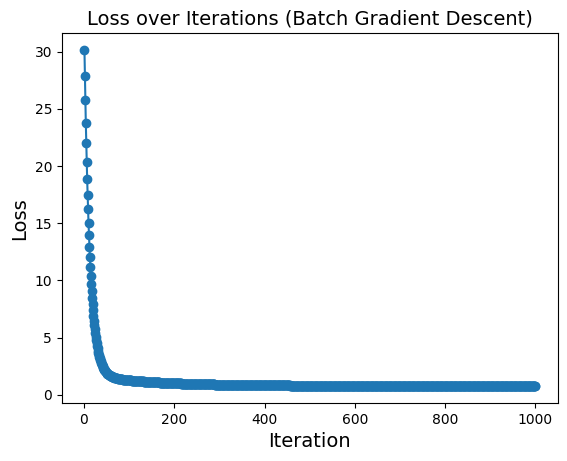

In [73]:
# Plot the loss values over iterations
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
plt.xlabel('Iteration', fontsize='14')
plt.ylabel('Loss', fontsize='14')
plt.title('Loss over Iterations (Batch Gradient Descent)', fontsize='14')
plt.show()

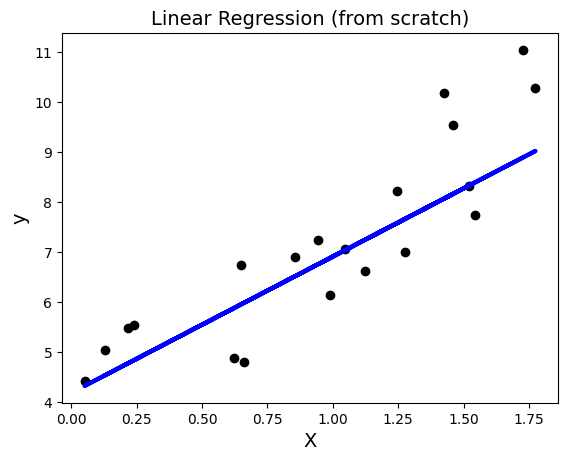

In [74]:
# Visualize the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X', fontsize='14')
plt.ylabel('y', fontsize='14')
plt.title('Linear Regression (from scratch)', fontsize='14')
plt.show()